# Дисциплина Проектный практикум

# Проект: Прогнозирование одобрения кредита (Loan Approval Prediction)

# Команда:

## 1. Богданова Наталья
## 2. Векслер Александр
## 3. Заичкин Артём
## 4. Ставриянов Григорий
## 5. Степанов Сергей
## 6. Бурцев Александр


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Описание задания

Проведите предварительную обработку данных для дальнейшего анализа (используйте материалы Вебинара «Предварительная обработка данных»):

Загрузить данные проекта с сайта кегл в среду разработки

Провести предварительный анализ данных (без визуализации)

Выявить пропуски в данных

Принять решение по обработке найденных пропусков

Выявить категориальные признаки

Преобразовать категориальные данные

Нормировать данные выбранным методом

# Загрузить данные проекта с сайта Kaggle в среду разработки
https://www.kaggle.com/competitions/playground-series-s4e10/data?select=train.csv

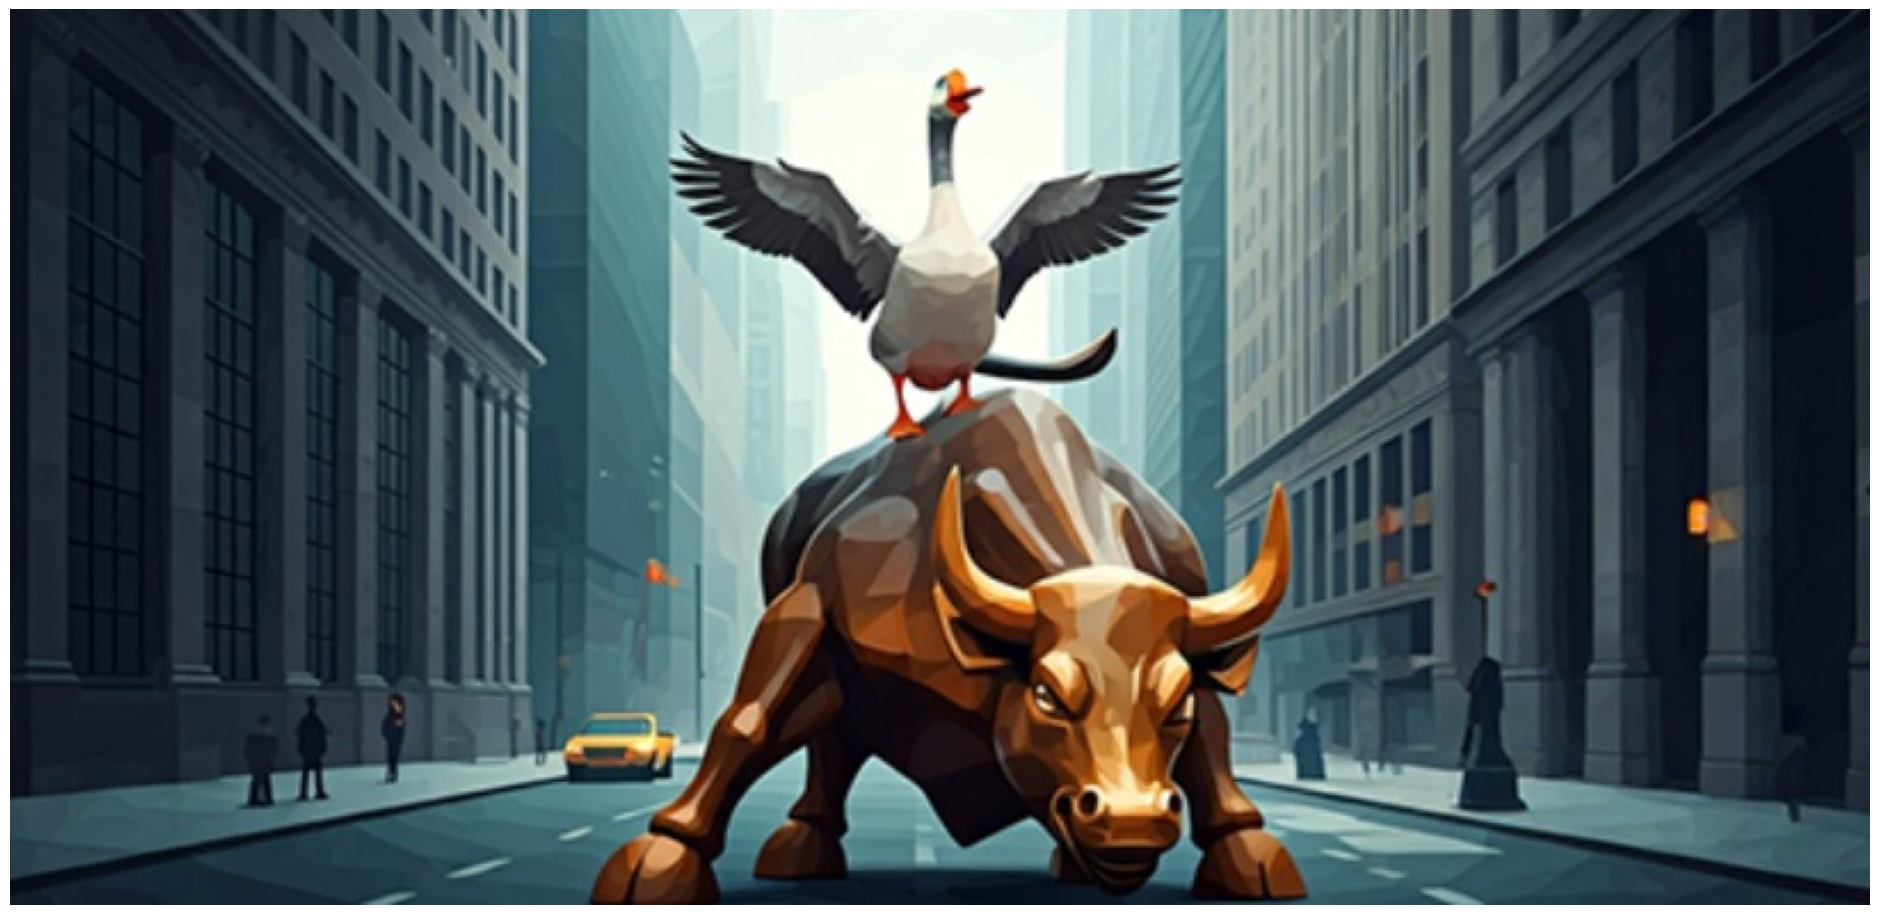

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/Colab Notebooks/Проектный практикум/loan.jpg"
img = Image.open(image_path)
plt.figure(figsize=(24, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Метрики для оценки модели
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)



In [ ]:
# загрузка датасета
train_begin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проектный практикум/train.csv')

Загрузили 3 датасета: обучающая выборка, тестовая выборка и целевой признак для тестовой выборки.

### Признаки

1   person_age (возраст заемщика)  

2   person_income (доход заемщика)  

3   person_home_ownership             
     (тип жилья: OWN/RENT/OTHER)

4   person_emp_length               
     (стаж работы в годах)

5   loan_intent (цель кредита)   

6   loan_grade (кредитный рейтинг)   

7   loan_amnt (сумма кредита)  

8   loan_int_rate (процентная ставка)

9   loan_percent_income             
     (платеж как % от дохода)

10  cb_person_default_on_file       
     (имелись ли дефолты: Y/N)
     
11  cb_person_cred_hist_length        
     (длина кредитной истории в годах)

# Провести предварительный анализ данных (без визуализации)

In [ ]:
# просматриваем первые 5 строк обучающей выборки
train_begin.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
# просматриваем типы данных и наличие пропусков обучающей выборки
train_begin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
# просматриваем описательную статистику обучающей выборки
train_begin.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# Выявить пропуски в данных

# Принять решение по обработке найденных пропусков

In [ ]:
# выявить пропуски
missing_values = train_begin.isnull().sum()
print("Пропущенные значения в каждом столбце датасета train:")
print(missing_values)
print(missing_values[missing_values > 0])

Пропущенные значения в каждом столбце датасета train:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
Series([], dtype: int64)


In [ ]:
# Проверка на дубликаты
print("Количество дубликатов train:", train_begin.duplicated().sum())
# Удаление дубликатов
# train = train.drop_duplicates()
# print("Размерность данных после очистки train:", train.shape)

Количество дубликатов train: 0


Пропуски отсутствуют в выборке. Таким образом нет никакой необходимости в их заполнении.

Дубликаты отсутствуют.

# Выявить категориальные признаки

# Преобразовать категориальные данные

In [ ]:
# найти все признаки, в которых первое значение - строка
def find_cat(train, num_uniq=4):
    for name in train_begin.columns:
        s = ''
        s += name
        if (type(train_begin[name][0]) == str):
            s += ' строка,'
        if (train_begin[name].nunique()<=num_uniq):
            s += ' мало уникальных'
        if (s!=name):
            print (s)

find_cat(train_begin)

person_home_ownership строка, мало уникальных
loan_intent строка,
loan_grade строка,
cb_person_default_on_file строка, мало уникальных
loan_status мало уникальных


Следовательно, категориальные признаки:

- person_home_ownership

- loan_intent

- loan_grade

- cb_person_default_on_file

In [ ]:
# One-hot-encoding: получение дамми-признаков
train_begin = pd.get_dummies(train_begin, drop_first=True)

In [ ]:
train_begin.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,37,35000,0.0,6000,11.49,0.17,14,0,False,...,False,False,False,True,False,False,False,False,False,False
1,1,22,56000,6.0,4000,13.35,0.07,2,0,False,...,True,False,False,False,True,False,False,False,False,False
2,2,29,28800,8.0,6000,8.90,0.21,10,0,False,...,False,True,False,False,False,False,False,False,False,False
3,3,30,70000,14.0,12000,11.11,0.17,5,0,False,...,False,False,True,True,False,False,False,False,False,False
4,4,22,60000,2.0,6000,6.92,0.10,3,0,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
train_begin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           58645 non-null  int64  
 1   person_age                   58645 non-null  int64  
 2   person_income                58645 non-null  int64  
 3   person_emp_length            58645 non-null  float64
 4   loan_amnt                    58645 non-null  int64  
 5   loan_int_rate                58645 non-null  float64
 6   loan_percent_income          58645 non-null  float64
 7   cb_person_cred_hist_length   58645 non-null  int64  
 8   loan_status                  58645 non-null  int64  
 9   person_home_ownership_OTHER  58645 non-null  bool   
 10  person_home_ownership_OWN    58645 non-null  bool   
 11  person_home_ownership_RENT   58645 non-null  bool   
 12  loan_intent_EDUCATION        58645 non-null  bool   
 13  loan_intent_HOME

Преобразовали следующие категориальные признаки:

- person_home_ownership
(тип жилья: OWN/RENT/OTHER)

- loan_intent (цель кредита)

- loan_grade (кредитный рейтинг)

- cb_person_default_on_file
(имелись ли дефолты: Y/N)

Для преобразования использовали OrdinalEncoder

# Поиск корреляции между признаками

<Axes: >

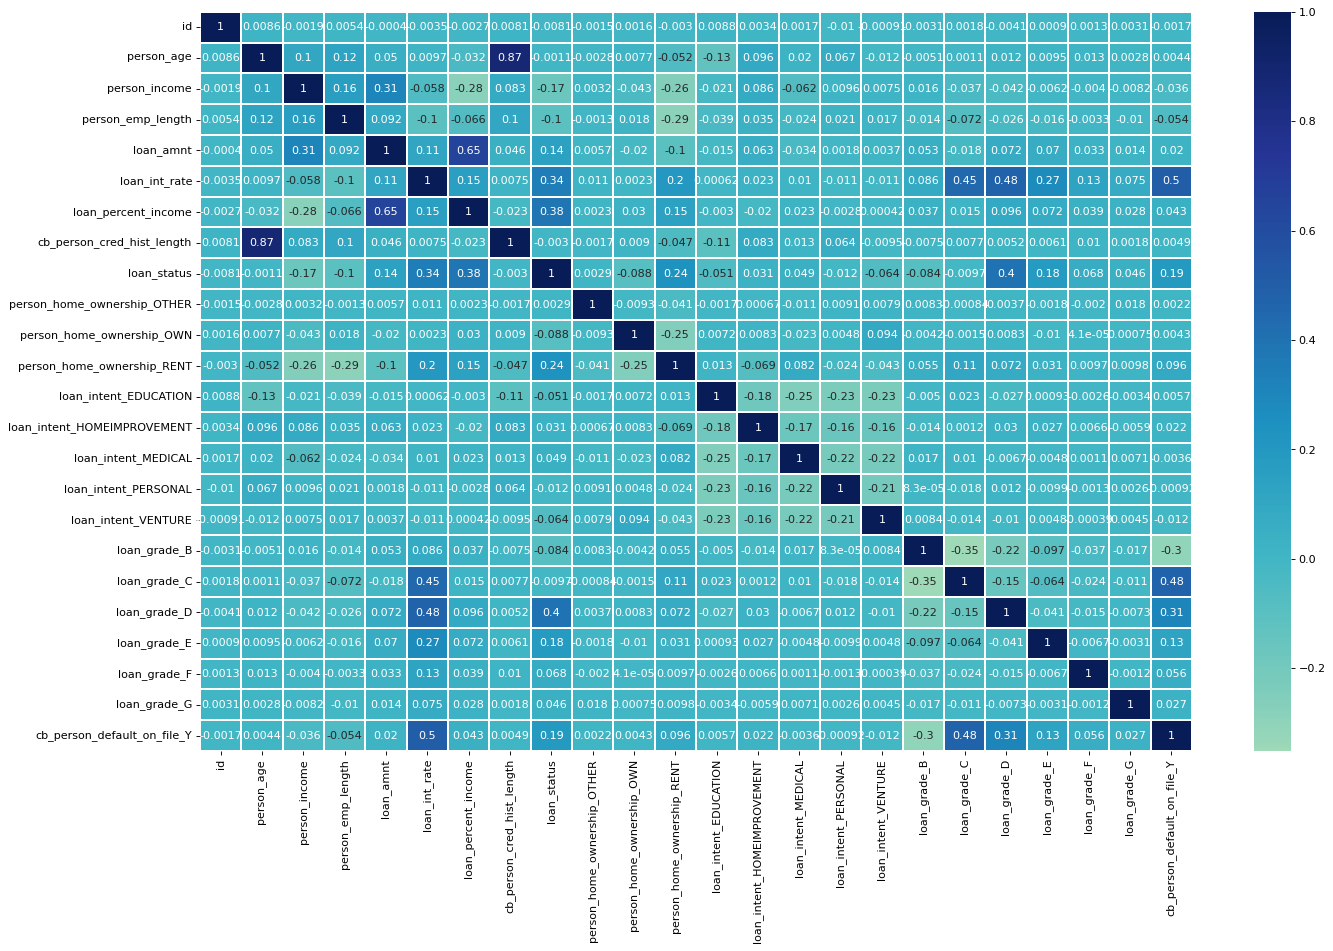

In [ ]:
# Рассчитываем корреляцию между признаками и визуализируем
plt.figure(figsize=(20,12), dpi= 80)
sns.heatmap(train_begin.corr(),  cmap='YlGnBu', center=0, annot=True, linewidths = 0.1)

In [ ]:
# Строим матрицу корреляции
corr_matrix = train_begin.corr()
print(corr_matrix)

                                   id  person_age  person_income  \
id                           1.000000    0.008608      -0.001896   
person_age                   0.008608    1.000000       0.102176   
person_income               -0.001896    0.102176       1.000000   
person_emp_length            0.005376    0.121276       0.164042   
loan_amnt                   -0.000403    0.050378       0.310942   
loan_int_rate               -0.003454    0.009653      -0.057611   
loan_percent_income         -0.002677   -0.031975      -0.280314   
cb_person_cred_hist_length   0.008139    0.874260       0.082727   
loan_status                 -0.008138   -0.001130      -0.169956   
person_home_ownership_OTHER -0.001452   -0.002834       0.003164   
person_home_ownership_OWN    0.001638    0.007729      -0.042509   
person_home_ownership_RENT  -0.003035   -0.051748      -0.260716   
loan_intent_EDUCATION        0.008843   -0.127255      -0.020682   
loan_intent_HOMEIMPROVEMENT  0.003434    0.09644

На основе представленной матрицы корреляции можно сделать следующие выводы о взаимосвязях между переменными:

### Сильные корреляции (|r| > 0.5)
Возраст и кредитная история:

person_age и cb_person_cred_hist_length: 0.70

Ожидаемая сильная связь - чем старше человек, тем длиннее его кредитная история

Доход и сумма займа:

person_income и loan_amnt: 0.33

Люди с более высоким доходом берут большие кредиты

Процентная ставка и дефолт:

loan_int_rate и cb_person_default_on_file_Y: 0.50

Клиентам с прошлыми дефолтами назначают более высокие ставки

Процентная ставка и кредитный рейтинг:

Сильная связь с градациями (grade C: 0.45, grade D: 0.48)

Чем хуже кредитный рейтинг, тем выше процентная ставка

### Умеренные корреляции (0.3 < |r| < 0.5)
Статус займа (дефолт):

Положительная связь с процентной ставкой (0.34)

Положительная связь с loan_percent_income (0.38)

Положительная связь с grade D (0.40)

Положительная связь с арендой жилья (0.24)

Аренда жилья:

Отрицательная связь с доходом (-0.31)

Положительная связь с процентной ставкой (0.20)

### Слабые корреляции (|r| < 0.3)
Большинство других связей слабые, но некоторые примечательные:

Отрицательная связь между владением жильем (OWN) и статусом займа (-0.09)

Положительная связь между целью кредита "медицина" и статусом займа (0.05)


In [ ]:
train_3 = train_begin.copy()

In [ ]:
# Метрики для оценки модели логистической регрессии
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

import warnings
warnings.filterwarnings("ignore")

# Функция для оценки модели
def evaluate_model(X, y, model_name="Logistic Regression"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }

#    print(f"\nМетрики модели ({model_name}):")
#    print(classification_report(y_test, y_pred))
#    print("ROC-AUC:", metrics['roc_auc'])

    return metrics

# 1. Бейзлайн (только числовые признаки без обработки)
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
X_base = train_begin[numeric_features].fillna(train_begin[numeric_features].mean())
y = train_begin['loan_status']

base_metrics = evaluate_model(X_base, y, "Бейзлайн")

# 2. Модель после обработки (из Спринта 1)
X_processed = train_begin.drop('loan_status', axis=1).fillna(train_begin.mean())

processed_metrics = evaluate_model(X_processed, y, "После обработки")

# 3. Модель с новыми признаками
#X_engineered = train_eng.drop('loan_status', axis=1).fillna(train_eng.mean())

#engineered_metrics = evaluate_model(X_engineered, y, "С новыми признаками")

# 4. Отбор признаков (SelectFromModel)
#selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
#selector.fit(X_engineered, y)
#X_selected = selector.transform(X_engineered)

#selected_metrics = evaluate_model(X_selected, y, "После отбора признаков")

# Сравнение метрик
metrics_comparison = pd.DataFrame({
    'Бейзлайн': base_metrics,
    'После обработки': processed_metrics
#    'С новыми признаками': engineered_metrics,
#    'После отбора признаков': selected_metrics
}).T

print("\nСравнение метрик всех моделей:")
print(metrics_comparison)


Сравнение метрик всех моделей:
                 accuracy  precision    recall        f1   roc_auc
Бейзлайн         0.887575   0.694754  0.354133  0.469136  0.868153
После обработки  0.903092   0.762922  0.448541  0.564940  0.892663


# Этап 4. Примените основные методы по определению выбросов в данных.

## Примените статистический подход по поиску выбросов.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Визуализация распределений

In [ ]:
numeric = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

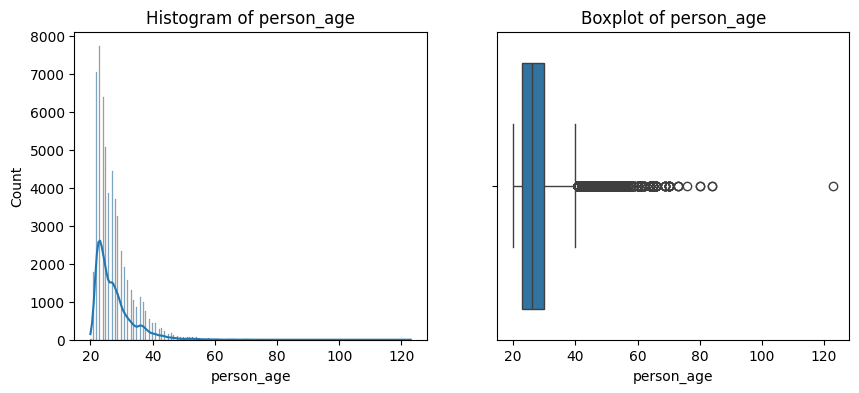

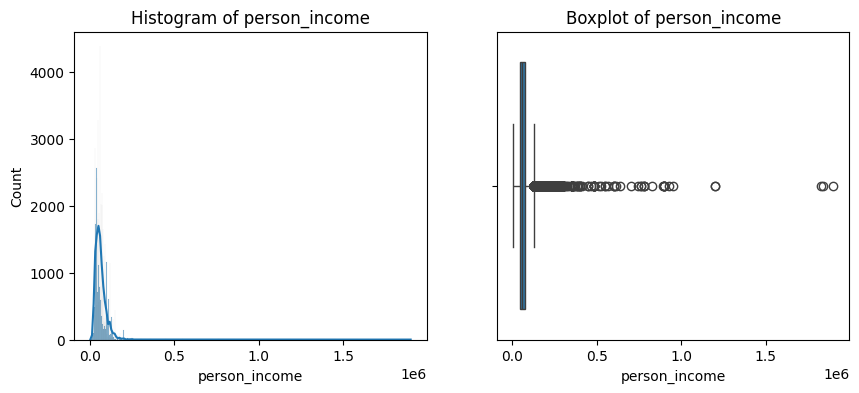

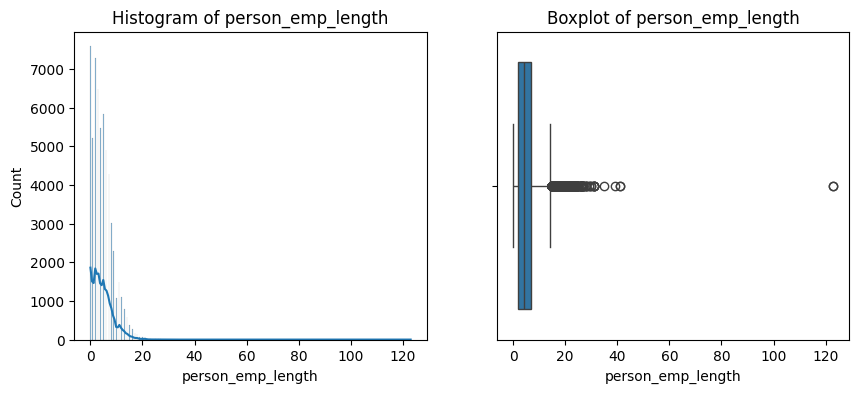

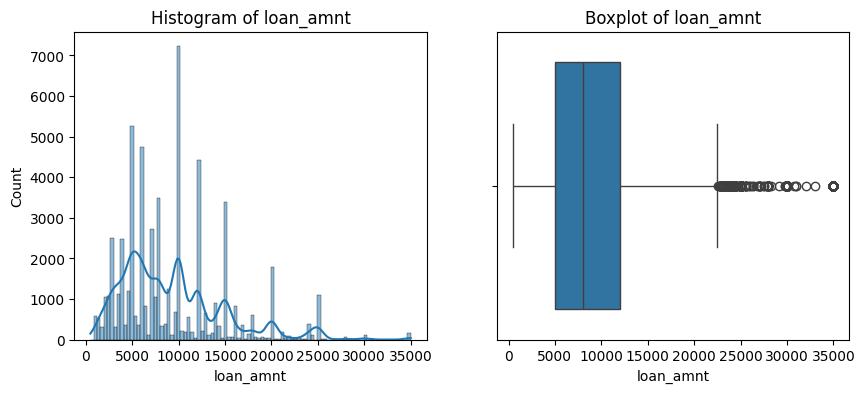

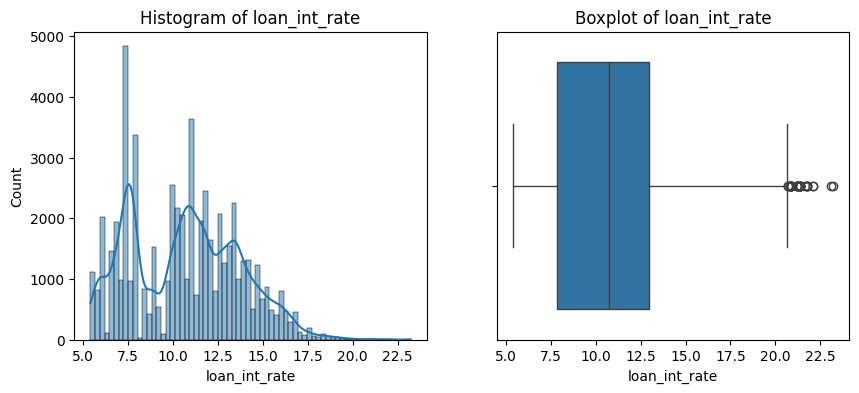

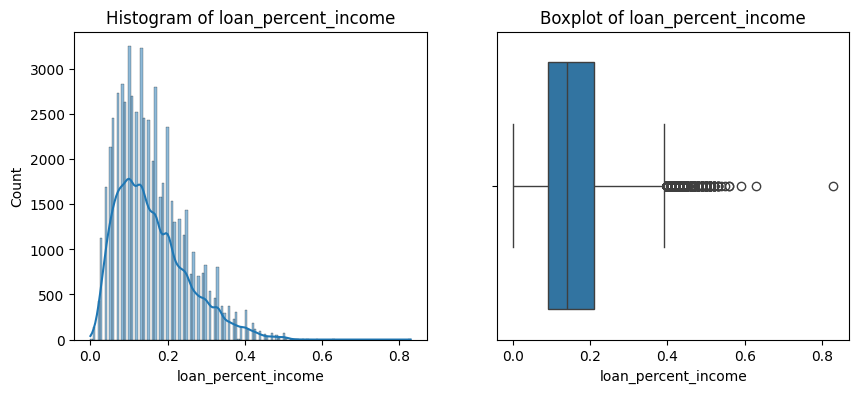

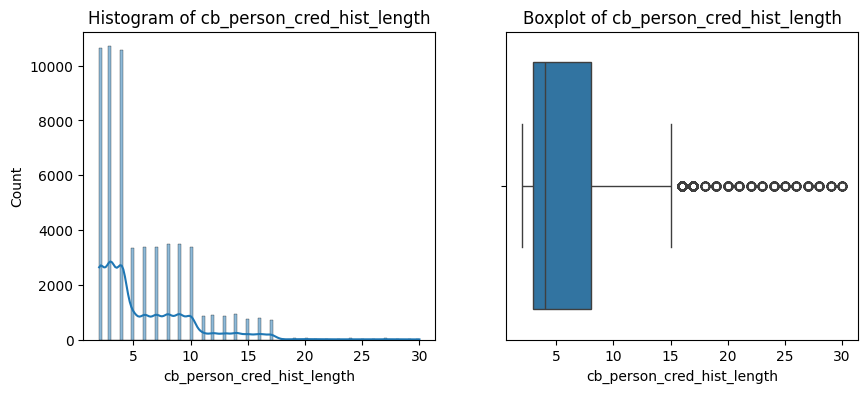

In [ ]:
# Гистограммы для числовых столбцов
num_cols = train_3[numeric]
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(train_3[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_3[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Удаление выбросов

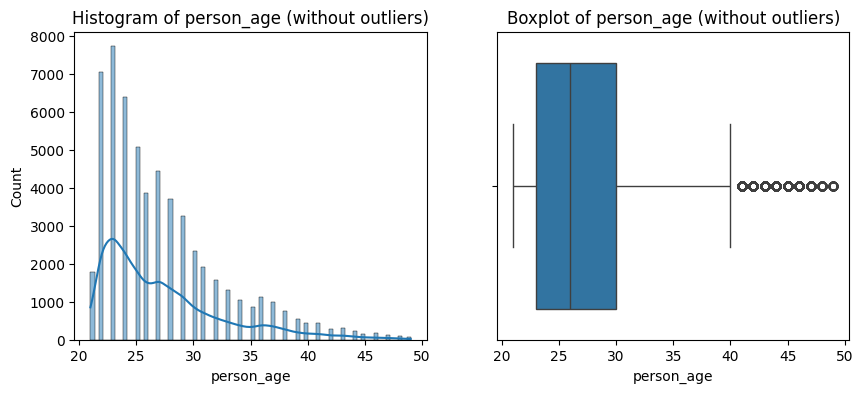

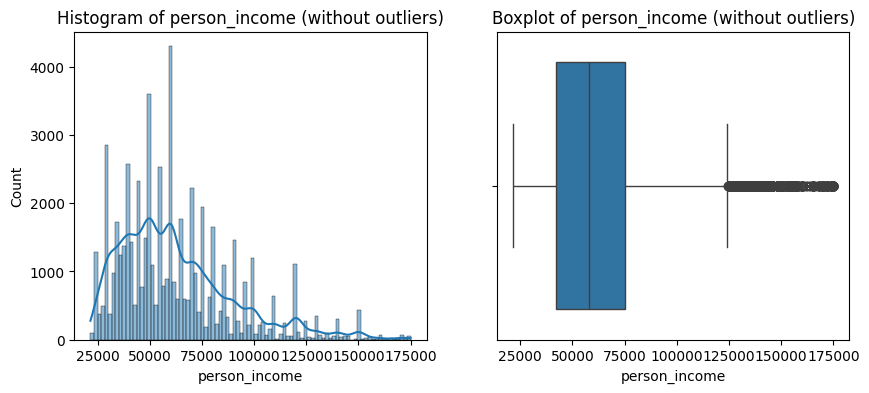

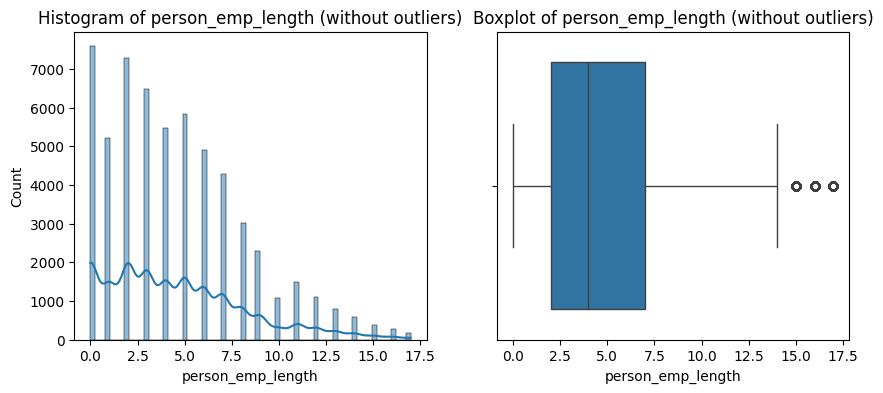

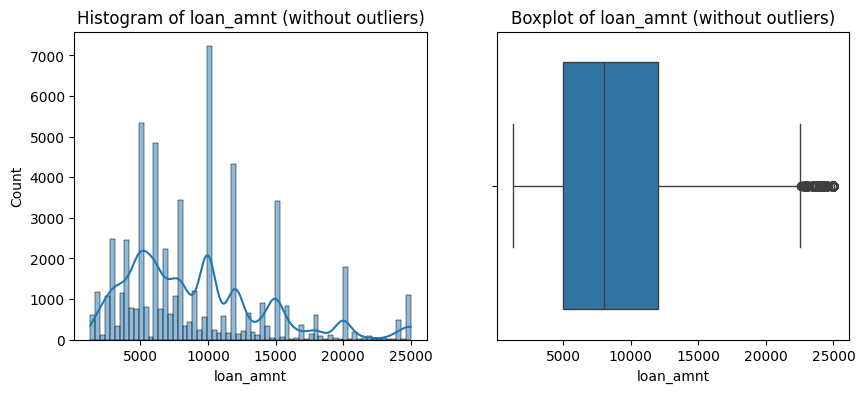

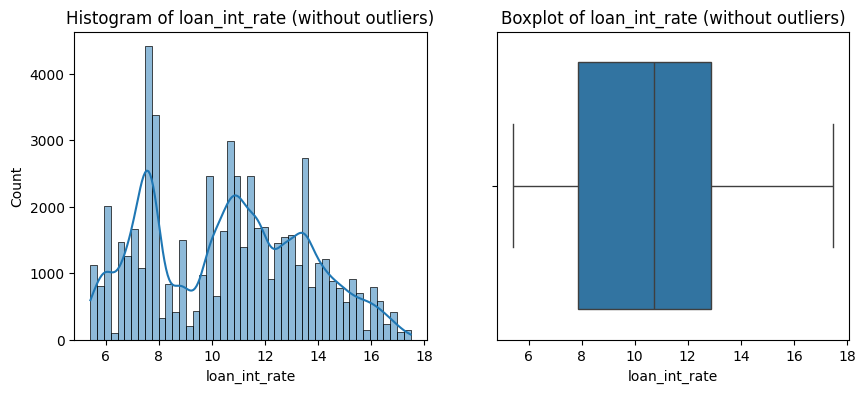

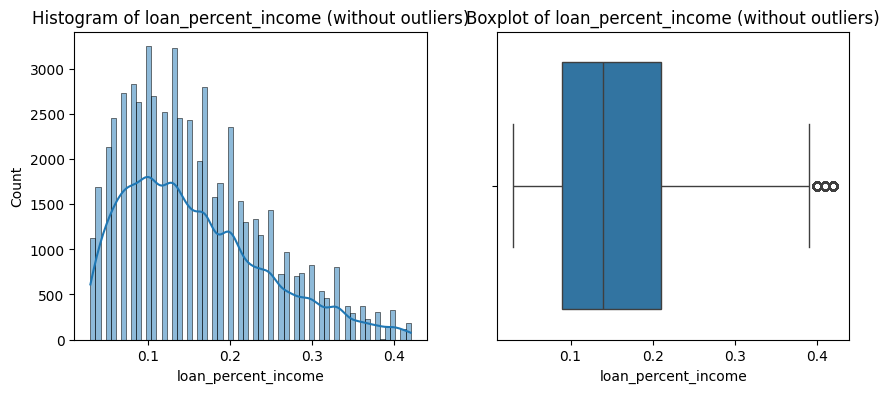

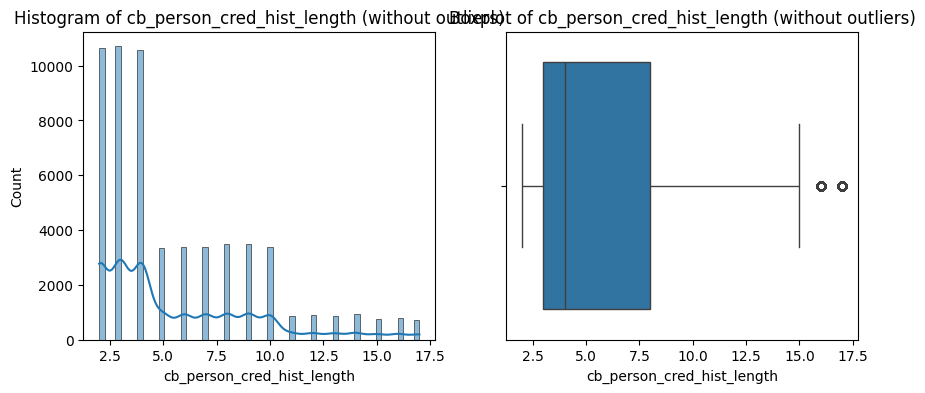

In [ ]:
# Гистограммы для числовых столбцов с удалением выбросов
num_cols = train_3[numeric]
for col in num_cols:
    # Определяем границы выбросов по квантилям (обычно 1% и 99%)
    lower_bound = train_3[col].quantile(0.01)
    upper_bound = train_3[col].quantile(0.99)

    # Фильтруем данные, удаляя выбросы
    filtered_data = train_3[(train_3[col] >= lower_bound) &
                               (train_3[col] <= upper_bound)]

    # Строим графики для очищенных данных
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(f'Histogram of {col} (without outliers)')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=filtered_data[col])
    plt.title(f'Boxplot of {col} (without outliers)')
    plt.show()

### Поиск выбросов статистическими методами

Метод 1: Межквартильный размах (IQR)

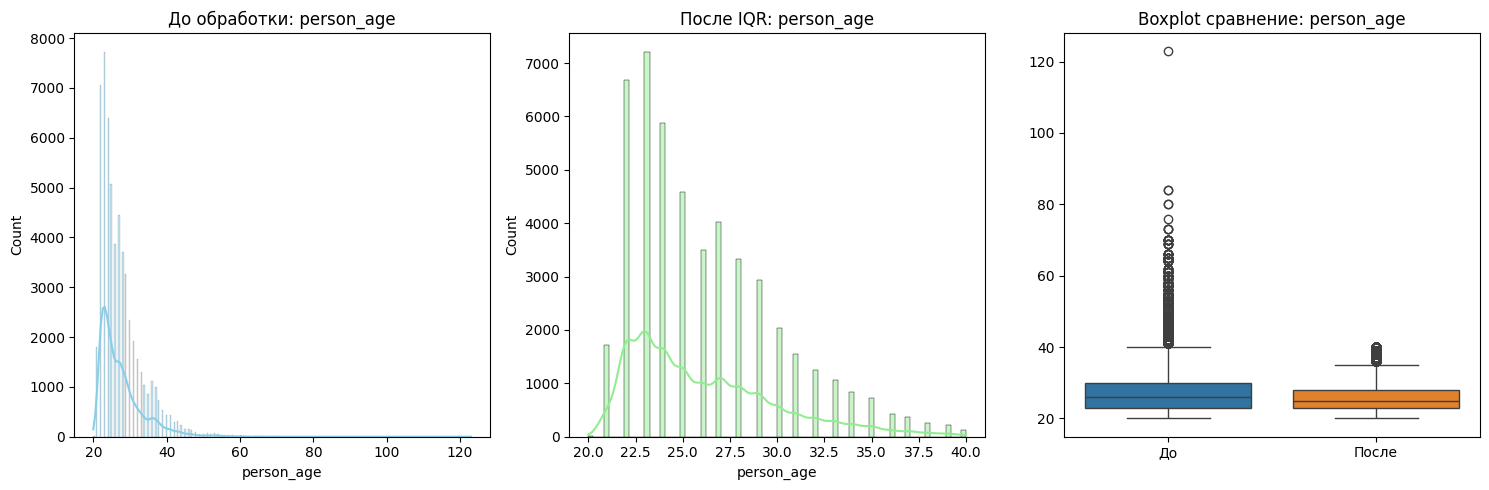

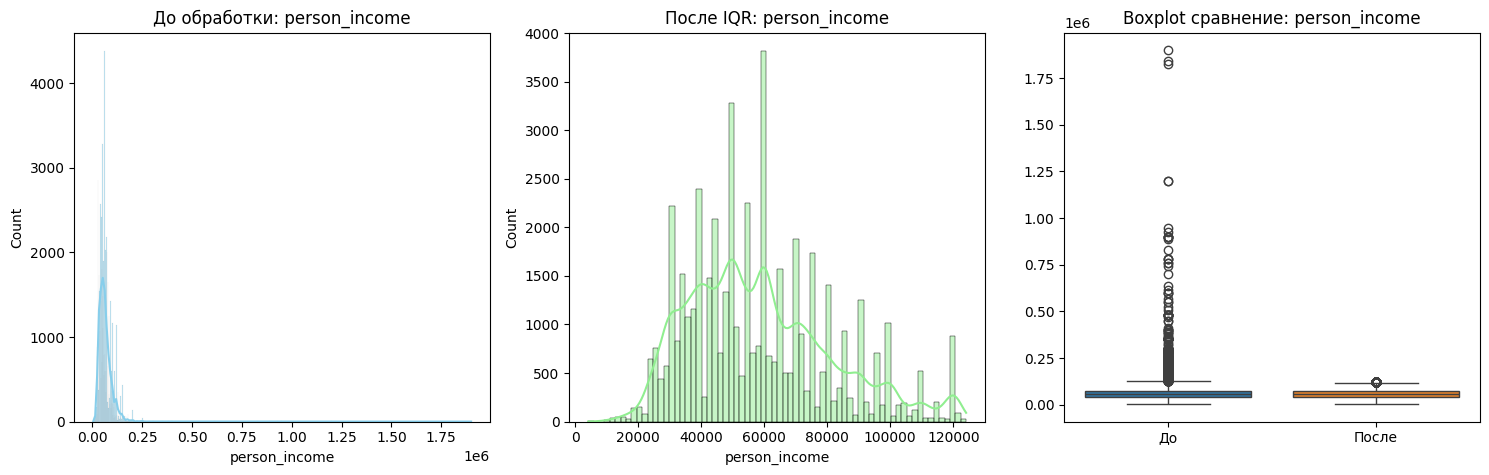

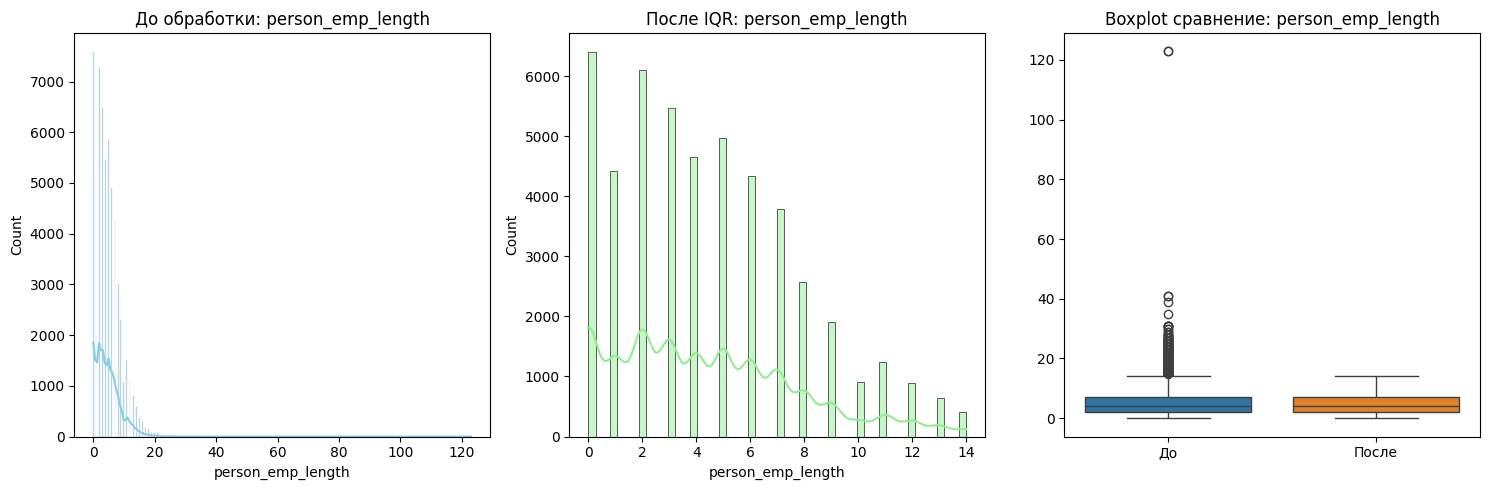

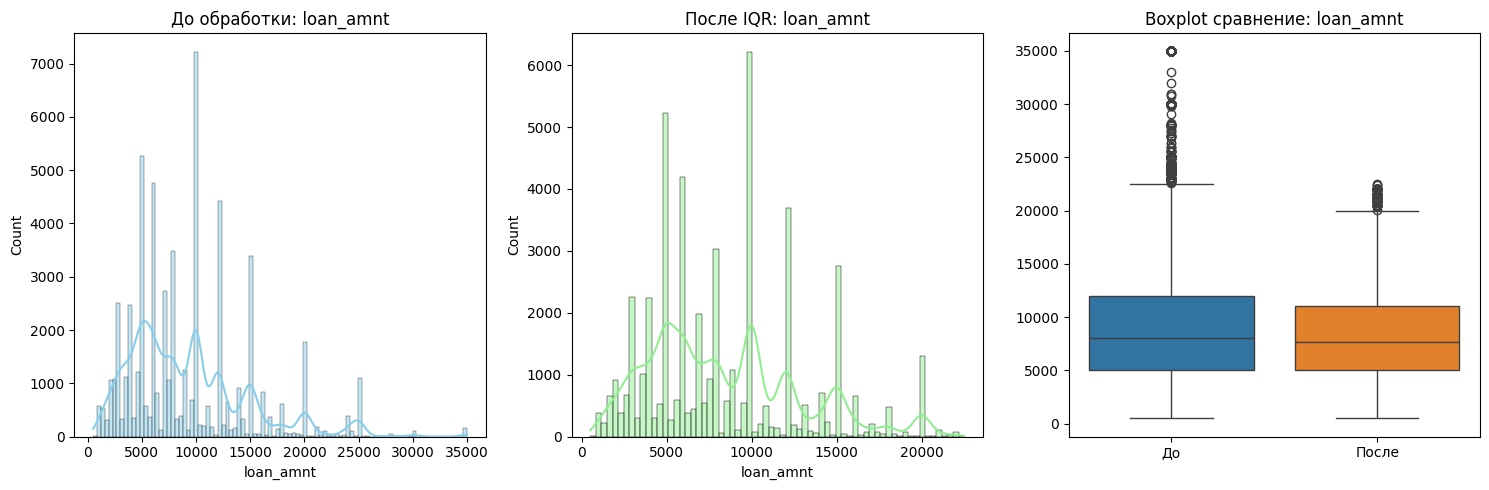

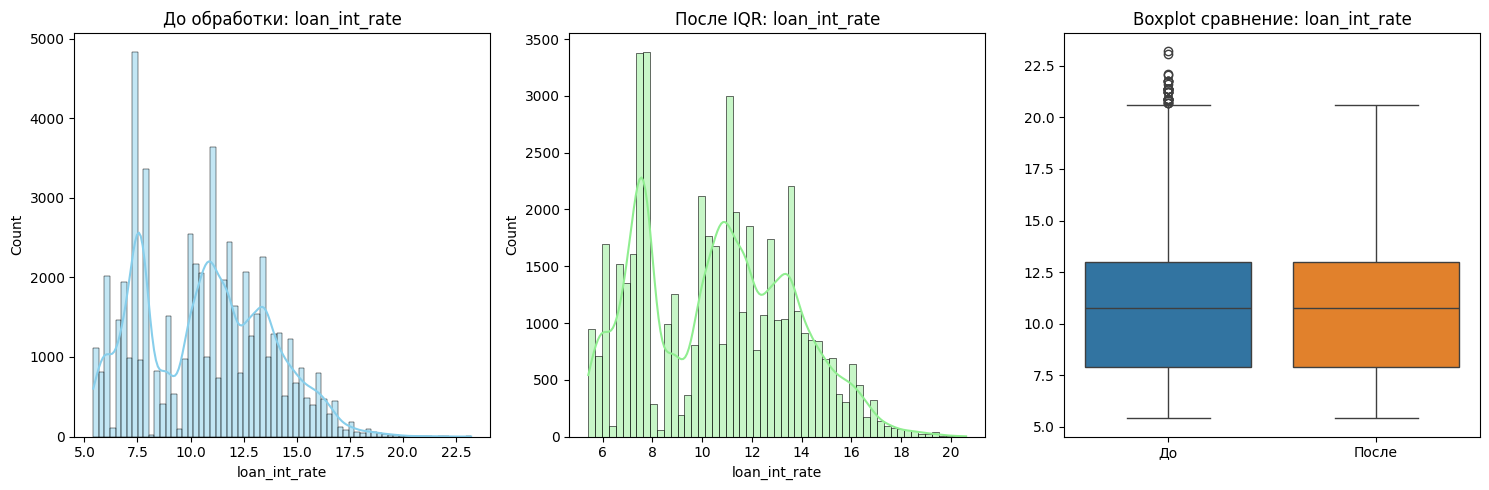

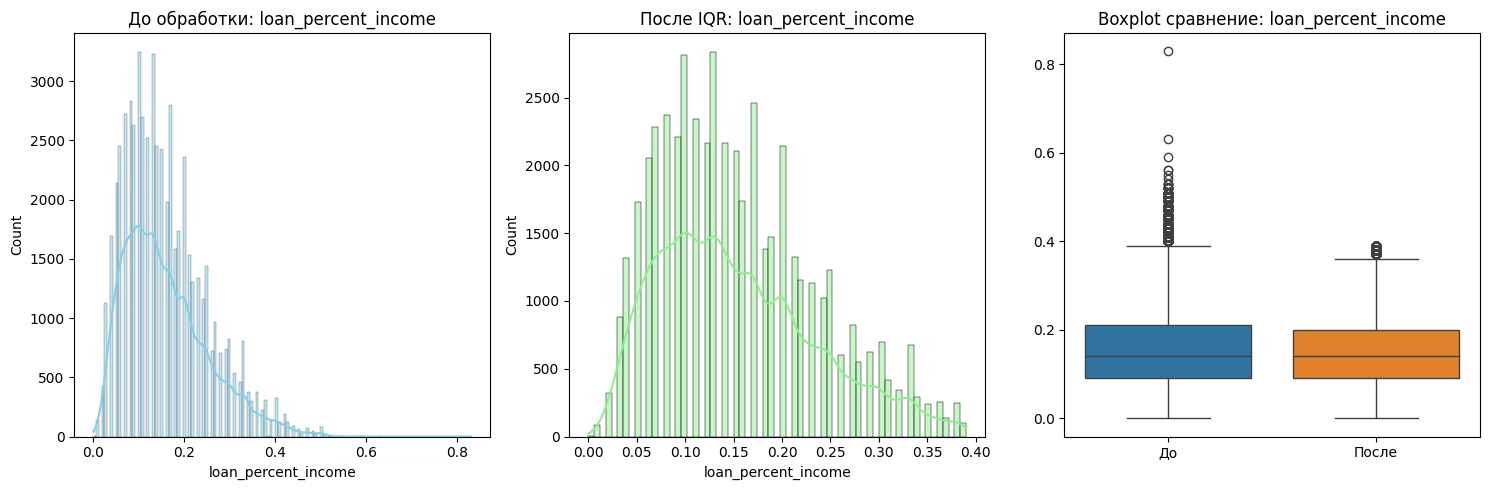

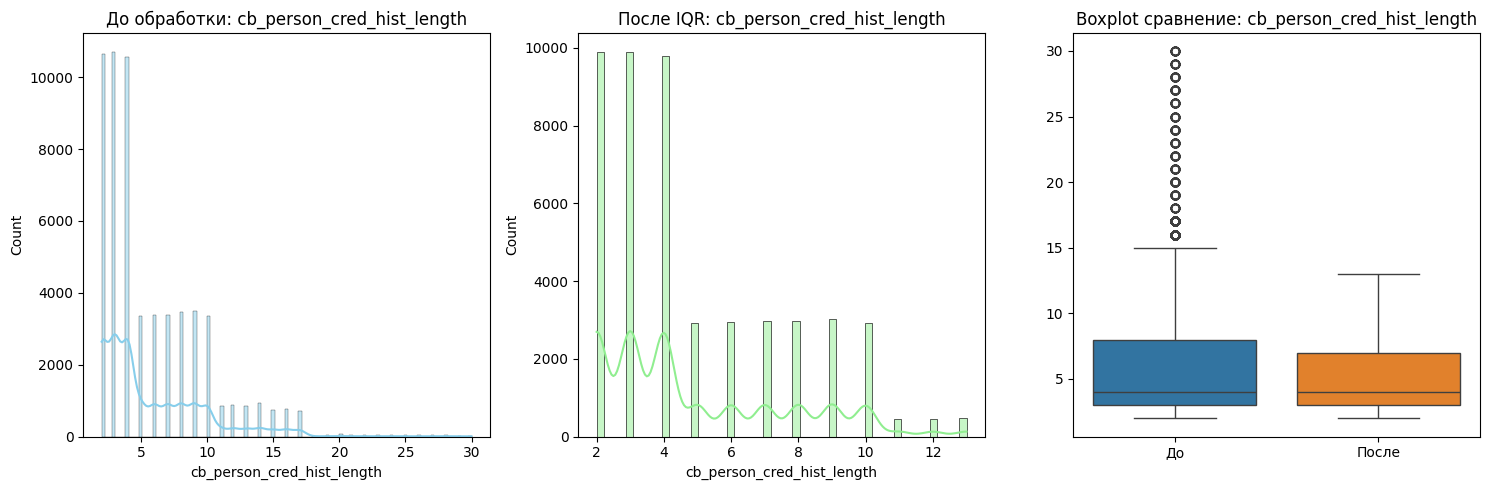

In [ ]:
# Создаем копию датасета для очистки
train_clean = train_3.copy()

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Применяем функцию
train_clean = remove_outliers_iqr(train_3, numeric)

for col in numeric:
    plt.figure(figsize=(15, 5))

    # Гистограмма до обработки
    plt.subplot(1, 3, 1)
    sns.histplot(train_3[col], kde=True, color='skyblue')
    plt.title(f'До обработки: {col}')

    # Гистограмма после обработки
    plt.subplot(1, 3, 2)
    sns.histplot(train_clean[col], kde=True, color='lightgreen')
    plt.title(f'После IQR: {col}')

    # Boxplot до и после (для сравнения выбросов)
    plt.subplot(1, 3, 3)
    sns.boxplot(data=pd.DataFrame({'До': train_3[col], 'После': train_clean[col]}))
    plt.title(f'Boxplot сравнение: {col}')

    plt.tight_layout()
    plt.show()



In [ ]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48727 entries, 1 to 58644
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           48727 non-null  int64  
 1   person_age                   48727 non-null  int64  
 2   person_income                48727 non-null  int64  
 3   person_emp_length            48727 non-null  float64
 4   loan_amnt                    48727 non-null  int64  
 5   loan_int_rate                48727 non-null  float64
 6   loan_percent_income          48727 non-null  float64
 7   cb_person_cred_hist_length   48727 non-null  int64  
 8   loan_status                  48727 non-null  int64  
 9   person_home_ownership_OTHER  48727 non-null  bool   
 10  person_home_ownership_OWN    48727 non-null  bool   
 11  person_home_ownership_RENT   48727 non-null  bool   
 12  loan_intent_EDUCATION        48727 non-null  bool   
 13  loan_intent_HOMEIMPRO

### Выводы по удалению выбросов в датасете

Объем данных после обработки
Исходный размер: 58,645 строк

Проведено удаление выбросов следующими методами:

*После квантильного метода (1%-99%)

*После IQR-метода

Результат: 48,727 строк

Удалено строк: ~9,918 (около 17% данных)

## Примените DBSCAN к задаче поиска выбросов.

1. При подготовке данных к DBSCAN применяется масштабирование данных

In [ ]:
scaler = StandardScaler()
numeric = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler.fit_transform(train_clean[numeric])
train_clean[numeric] = scaler.transform(train_clean[numeric])

In [ ]:
train_clean.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,1,-1.050588,-0.114317,0.474518,-0.972692,0.908034,-1.025935,-1.051151,0,False,...,True,False,False,False,True,False,False,False,False,False
2,2,0.731890,-1.307368,1.067866,-0.527515,-0.570395,0.697828,1.851663,0,False,...,False,True,False,False,False,False,False,False,False,False
3,3,0.986530,0.499753,2.847908,0.808018,0.163836,0.205325,0.037404,0,False,...,False,False,True,True,False,False,False,False,False,False
4,4,-1.050588,0.061131,-0.712176,-0.527515,-1.228213,-0.656557,-0.688299,0,False,...,True,False,False,False,False,False,False,False,False,False
5,5,0.222610,-0.596801,-0.712176,0.140252,-0.557106,0.574702,0.037404,0,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# train_4 = train_clean.copy()

2. Применение DBSCAN

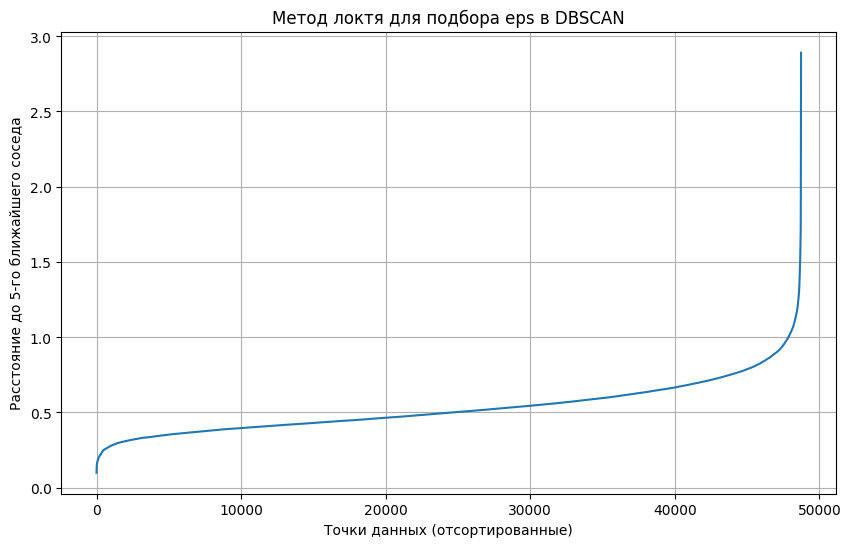

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors  # Для подбора eps

# Подбор eps с помощью метода (k-distance graph)
neigh = NearestNeighbors(n_neighbors=5)  # min_samples, у нас 7 признаков → можно 5-10
nbrs = neigh.fit(train_clean[numeric])
distances, _ = nbrs.kneighbors(train_clean[numeric])
distances = np.sort(distances[:, -1], axis=0)  # Сортируем расстояния до 5-го соседа

# Визуализация для выбора eps
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Точки данных (отсортированные)')
plt.ylabel('Расстояние до 5-го ближайшего соседа')
plt.title('Метод локтя для подбора eps в DBSCAN')
plt.grid()
plt.show()

In [ ]:
# Применение DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=15)
outliers = dbscan.fit_predict(train_clean[numeric])
train_clean['dbscan_outlier'] = outliers

# Статистика по выбросам
print("Количество выбросов:", (outliers == -1).sum())
print("Доля выбросов:", (outliers == -1).mean())

Количество выбросов: 950
Доля выбросов: 0.019496377778233834


In [ ]:
train_clean['dbscan_outlier'].unique()

array([ 0, -1])

In [ ]:
# Удалим выбросы
train_no_outliers = train_clean[train_clean['dbscan_outlier'] == 0].copy()

# Проверим размер
print(f"Размер до удаления: {train_clean.shape}")
print(f"Размер после удаления выбросов: {train_no_outliers.shape}")

Размер до удаления: (48727, 25)
Размер после удаления выбросов: (47777, 25)


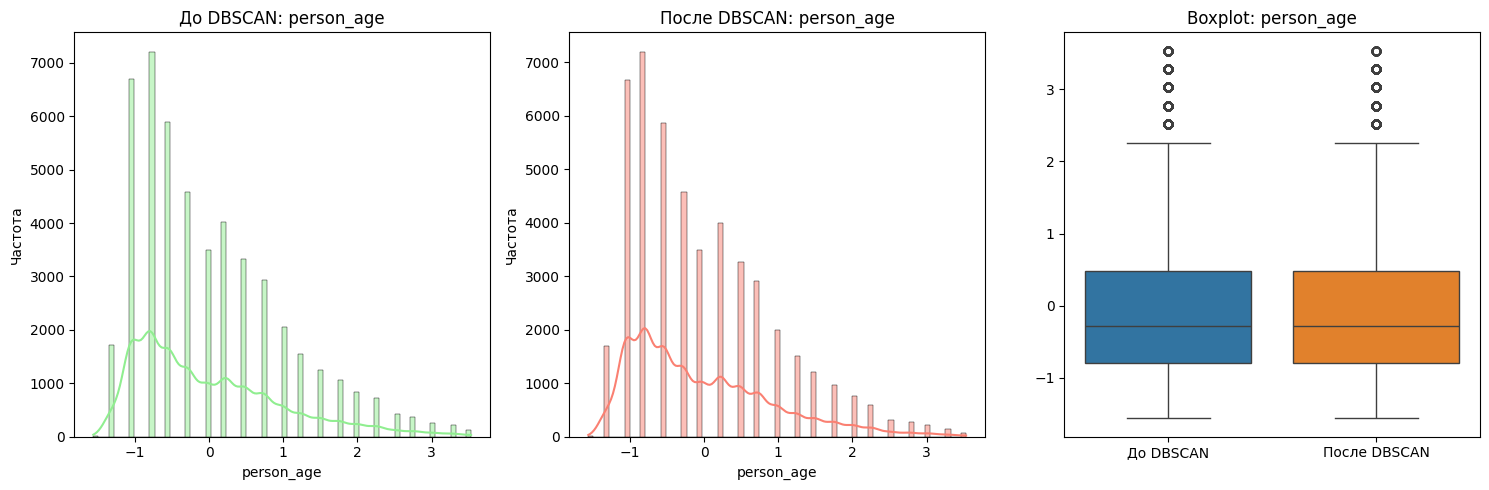

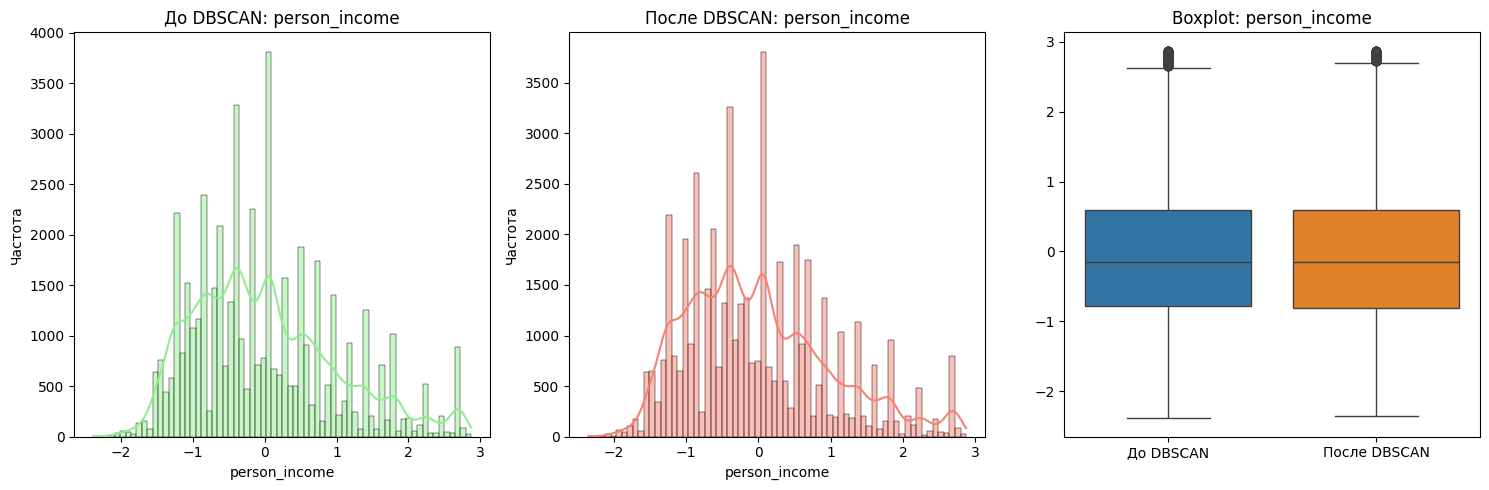

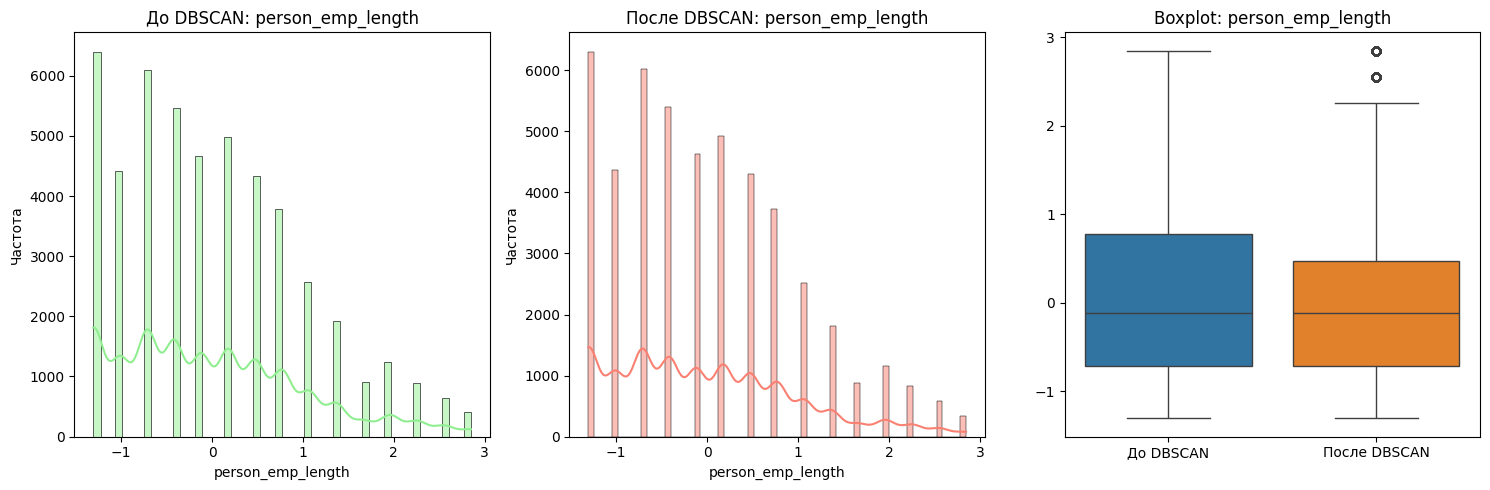

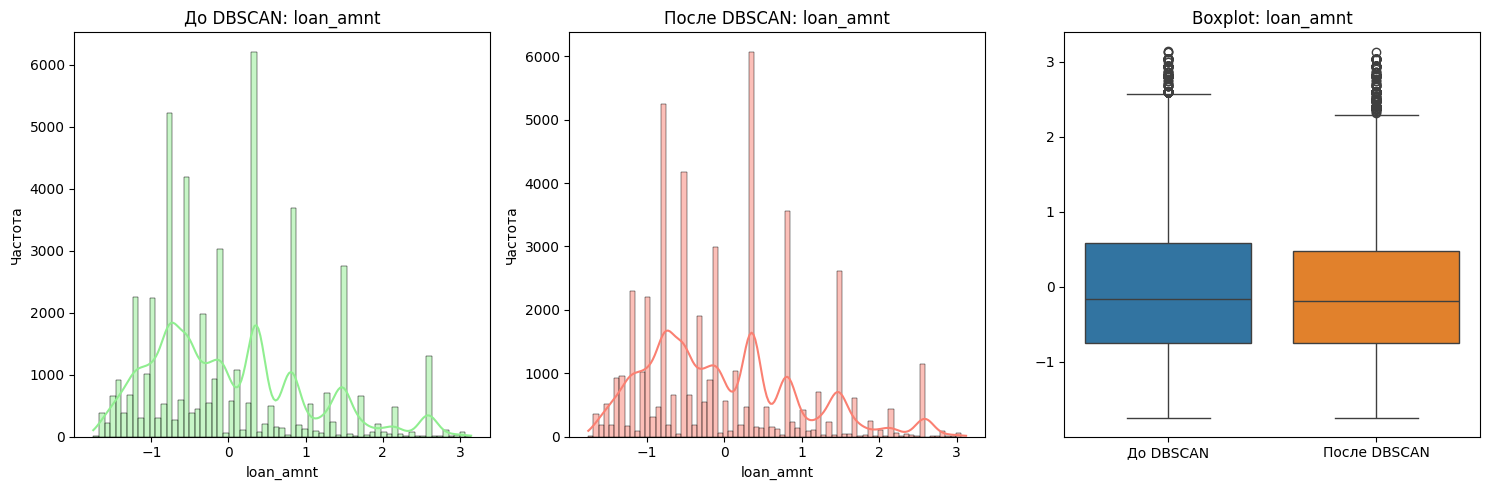

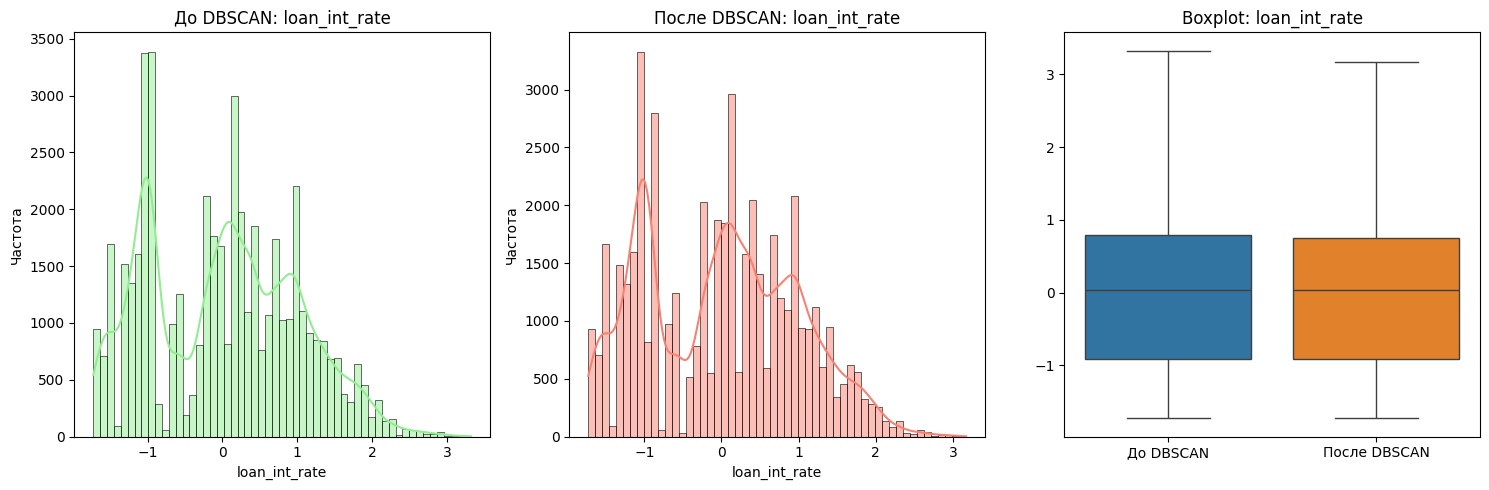

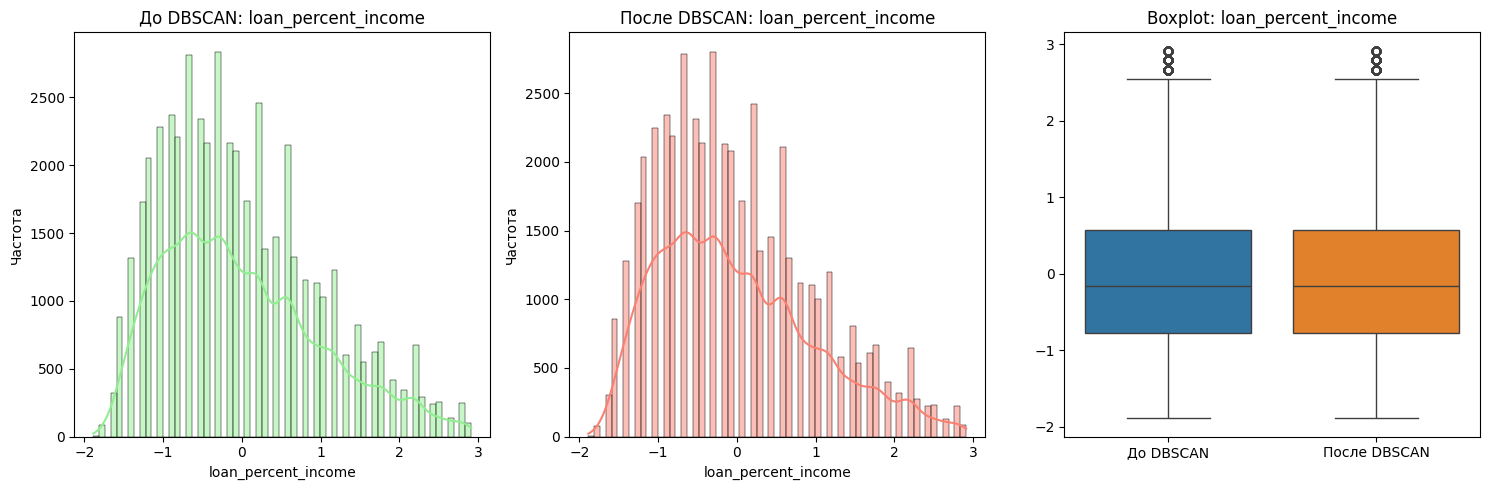

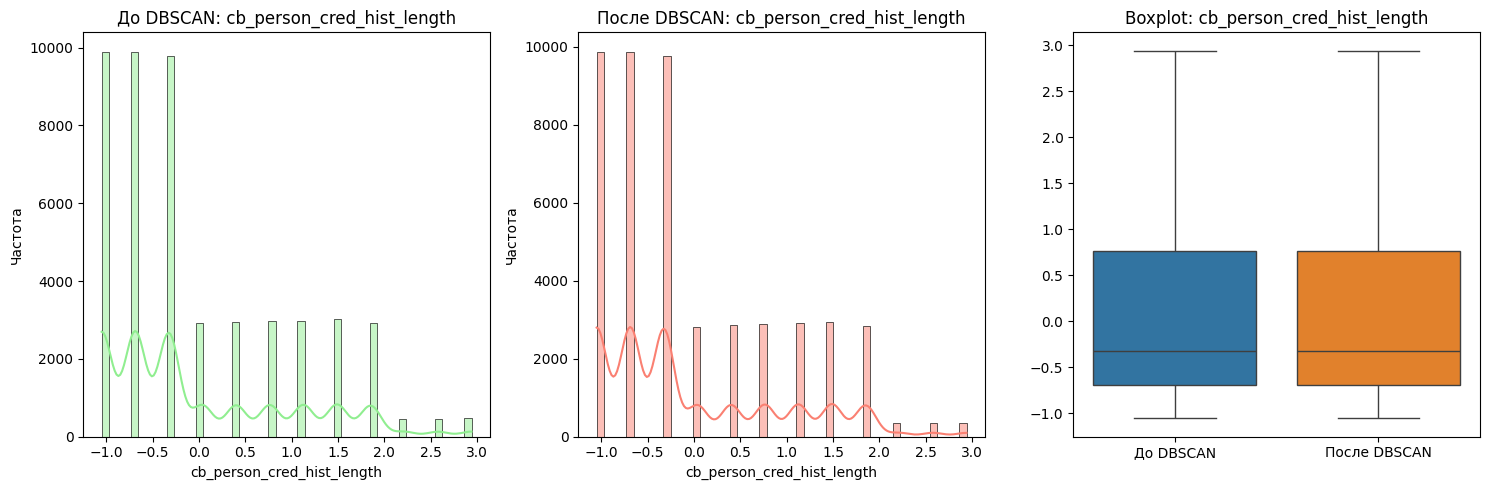

In [ ]:
for col in numeric:
    plt.figure(figsize=(15, 5))

    # 1. Гистограмма до DBSCAN
    plt.subplot(1, 3, 1)
    sns.histplot(train_clean[col], kde=True, color='lightgreen')
    plt.title(f'До DBSCAN: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

    # 2. Гистограмма после DBSCAN (удалены выбросы)
    plt.subplot(1, 3, 2)
    sns.histplot(train_no_outliers[col], kde=True, color='salmon')
    plt.title(f'После DBSCAN: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

    # 3. Boxplot сравнения до и после
    plt.subplot(1, 3, 3)
    sns.boxplot(data=pd.DataFrame({
        'До DBSCAN': train_clean[col],
        'После DBSCAN': train_no_outliers[col]
    }))
    plt.title(f'Boxplot: {col}')

    plt.tight_layout()
    plt.show()

## Выводы по удалению выбросов в датасете

Объем данных после обработки Исходный размер: 48727 строк

Проведено удаление выбросов следующими методами:

*После DBSCAN

Результат: 47777 строк

Удалено строк: ~950 (около 1,9% данных)


## Удалите найденные выбросы и обучите модель из Спринта 2. Оцените метрики. Сделайте вывод.

In [ ]:
# Retrain original model requirements: logistic regression, same evaluate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#def evaluate_model(X, y):
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#    model = LogisticRegression(max_iter=1000, random_state=42)
#    model.fit(X_train, y_train)
#    preds = model.predict(X_test)
#    probs = model.predict_proba(X_test)[:,1]
#    return {
#        'accuracy': accuracy_score(y_test, preds),
#        'precision': precision_score(y_test, preds, zero_division=0),
#        'recall': recall_score(y_test, preds, zero_division=0),
#        'f1': f1_score(y_test, preds, zero_division=0),
#        'roc_auc': roc_auc_score(y_test, probs)
#    }

# Evaluate on cleaned datasets

X_stat_clean = train_clean[numeric_features].fillna(train_clean[numeric_features].mean())
y_stat_clean = train_clean['loan_status']

stat_metrics = evaluate_model(X_stat_clean, y_stat_clean)

X_db_clean = train_no_outliers[numeric_features].fillna(train_no_outliers[numeric_features].mean())
y_db_clean = train_no_outliers['loan_status']

dbscan_metrics = evaluate_model(X_db_clean, y_db_clean)

# Compile results
results = pd.DataFrame({
    'baseline_raw': base_metrics,
    'processed': processed_metrics,
#    'engineered': engineered_metrics,
#    'selected': selected_metrics,
    'stat_cleaned': stat_metrics,
    'dbscan_cleaned': dbscan_metrics
}).T

print(results)

                accuracy  precision    recall        f1   roc_auc
baseline_raw    0.887575   0.694754  0.354133  0.469136  0.868153
processed       0.903092   0.762922  0.448541  0.564940  0.892663
stat_cleaned    0.892263   0.658824  0.303523  0.415584  0.860060
dbscan_cleaned  0.889912   0.684967  0.281569  0.399086  0.855312


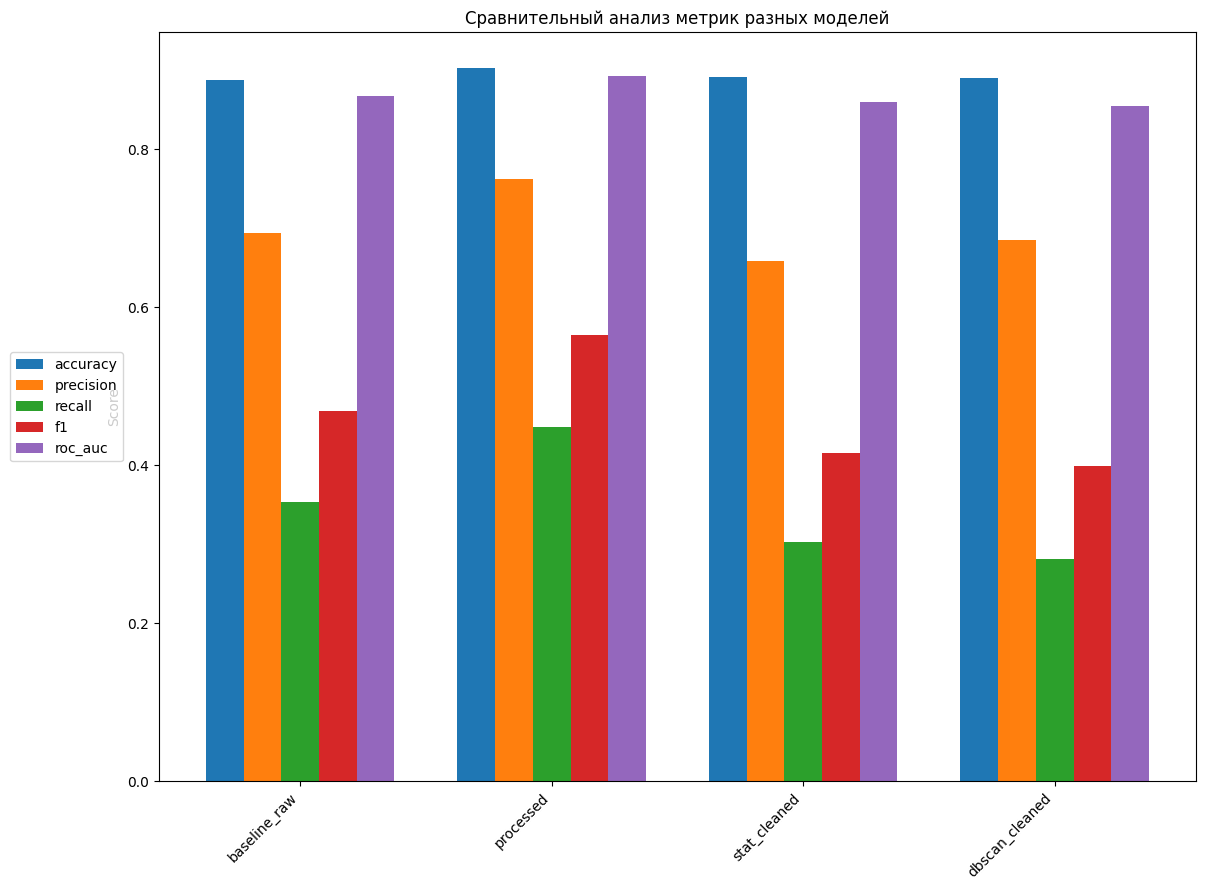

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# metrics_comparison — DataFrame с метриками
models = results.index.tolist()
metrics = results.columns.tolist()

x = np.arange(len(models))
width = 0.15

# Размер графика
fig, ax = plt.subplots(figsize=(12, 9))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_title('Сравнительный анализ метрик разных моделей')

# Легенду в левую часть вне области графика
ax.legend(loc='center left', bbox_to_anchor=(-0.15, 0.5))

plt.tight_layout()
plt.show()

На основе представленных метрик можно сделать следующие **выводы о качестве моделей логистической регрессии**, обученных на различных вариантах данных:

---

###  **Baseline (без обработки данных)**

* **Accuracy**: 88.76% — уже неплохая общая точность.
* **Precision**: 0.69 — приемлемая точность по положительному классу.
* **Recall**: 0.35 — модель пропускает большинство положительных случаев (одобренных кредитов).
* **F1-score**: 0.47 — низкий, поскольку `recall` слабый.
* **ROC AUC**: 0.87 — неплохое качество разделения классов.

> Базовая модель дает высокий accuracy, но плохо справляется с выявлением одобренных кредитов (низкий recall).

---

### **После предобработки (категориальные признаки и масштабирование)**

* **Accuracy**: 90.31% — наивысшая точность.
* **Precision**: 0.76 — лучше, чем у базовой модели.
* **Recall**: 0.45 — лучший показатель по сравнению с другими вариантами.
* **F1-score**: 0.56 — самый высокий.
* **ROC AUC**: 0.89 — улучшение в качестве классификации.

> **Лучшая модель** по всем метрикам. Предобработка данных (encoding, scaling) существенно повышает качество классификации.

---

### **После удаления выбросов по методу IQR (stat\_cleaned)**

* **Accuracy**: 89.23% — незначительно выше, чем у baseline.
* **Precision**: 0.66 — хуже, чем у baseline.
* **Recall**: 0.30 — ещё ниже.
* **F1-score**: 0.42 — незначительное улучшение.
* **ROC AUC**: 0.86 — чуть ниже baseline.

> Удаление выбросов по IQR **не улучшает**, а скорее ухудшает показатели модели.

---

### **После удаления выбросов методом DBSCAN**

* **Accuracy**: 88.99% — сопоставимо с baseline.
* **Precision**: 0.68 — слегка ниже baseline.
* **Recall**: 0.28 — самый низкий.
* **F1-score**: 0.40 — низкий.
* **ROC AUC**: 0.86 — как у IQR.

> Метод DBSCAN также **не улучшает** качество модели. Напротив, recall и f1 снижаются.

---

### **Итоговые выводы**

* Наилучшие результаты показывает модель после **базовой предобработки** (без выбросов и сложного инжиниринга).
* Методы очистки от выбросов (IQR и DBSCAN) **не дали улучшения**, и могут быть избыточными для логистической регрессии.
* **Recall** остаётся слабым у всех моделей — можно рассмотреть другие методы (например, балансировку классов или более сложные модели).
